# Setting up the workspace

## Importing the necessary modules

In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import igraph as ig

## Setting working directory

In [2]:
os.chdir('/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files')
os.getcwd()  # Prints the current working directory

'/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files'

## Connecting to coursework_py database

In [3]:
conn = sqlite3.connect('/Users/lewyiliang/Library/CloudStorage/OneDrive-SIM-SingaporeInstituteofManagement/Year 2/ST2195 - Programming for Data Science/Coursework/dataverse_files/coursework_py.db')

# 4. Can you detect cascading failures as delays in one airport create delays in others?

## Extracting the necessary data required for the question

In [4]:
# Query ontime table
q5_ontime = pd.read_sql_query("""
                           SELECT Origin, Dest, DepDelay, ArrDelay 
                           FROM ontime 
                           WHERE DepDelay > 0 AND DepDelay IS NOT NULL AND ArrDelay > 0 AND ArrDelay IS NOT NULL 
                           GROUP BY Origin, Dest
                           """, conn)

## Conducting network analysis

The rationale for conducting network analysis is to identify which nodes or edges in the network are the most important or influential. In the context of this question, airports are represented by nodes while flight routes are represented by edges, existing within the flight network of the USA. 

To detect whether cascading failures as delays in one airport will lead to delays in others, identifying the most important or influential airport will allow us to gain insights into the potential impact of disruptions the airport will cause other airports in the network in terms of delay. Subsequently, identifying critical flight routes that are crucial for maintaining the connectivity of the flight network will enable us to better understand the impact of the disruptions that could ensue if these flights were to experience delays.

### Calculating node degree

#### Why?

Calculating node degree in a flight network can provide information about how well connected an airport is in terms of direct flight routes. In particular, the degree of a node (airport) represents the number of direct flight routes it has with other airports in the network.

In [5]:
# Combining Origin and Dest columns (flight routes) from q5_ontime to create an edge list 
edges = q5_ontime[["Origin", "Dest"]]
edges.columns = ["from", "to"]
print(edges.head())

  from   to
0  ABE  ATL
1  ABE  AVP
2  ABE  BWI
3  ABE  CLE
4  ABE  CLT


In [6]:
# Removing duplicate edges and self-loops
edges = edges.drop_duplicates()
edges = edges.loc[edges['from'] != edges['to']]

In [7]:
# Creating a network graph
net = ig.Graph.TupleList(edges.itertuples(index=False), directed=True)
print(net.vs)

In [8]:
# Assigning the corresponding name (IATA code) of each vertex (Airport)
# Disclaimer: In this code, the terms "vertex" and "node" are used interchangeably to refer to the same thing in network analysis
net.vs['label'] = net.vs['name']
print(net.vs['label'])

['ABE', 'ATL', 'AVP', 'BWI', 'CLE', 'CLT', 'CVG', 'DTW', 'JFK', 'LGA', 'ORD', 'PHL', 'ABI', 'DFW', 'IAH', 'ABQ', 'AMA', 'AUS', 'DAL', 'DEN', 'ELP', 'EWR', 'HOU', 'IAD', 'LAS', 'LAX', 'LBB', 'MAF', 'MCI', 'MCO', 'MDW', 'MSP', 'OAK', 'OKC', 'ONT', 'PDX', 'PHX', 'SAN', 'SAT', 'SEA', 'SFO', 'SLC', 'SMF', 'STL', 'TPA', 'TUL', 'TUS', 'ABY', 'ACK', 'ACT', 'ACV', 'CEC', 'MFR', 'RDD', 'ACY', 'BOS', 'MYR', 'ADK', 'AKN', 'ANC', 'ADQ', 'AEX', 'AGS', 'DLG', 'ALB', 'BDL', 'DCA', 'ALO', 'BET', 'CDV', 'FAI', 'HNL', 'JNU', 'KOA', 'OGG', 'OME', 'OTZ', 'SCC', 'APF', 'ASE', 'ATW', 'AVL', 'AZO', 'BGM', 'BGR', 'BHM', 'BMI', 'BNA', 'BOI', 'BPT', 'BQK', 'BQN', 'BTR', 'BTV', 'BUF', 'BUR', 'BZN', 'CAE', 'CAK', 'CHA', 'CHO', 'CHS', 'CID', 'CMH', 'CMI', 'COS', 'CRP', 'CRW', 'CSG', 'DAB', 'DAY', 'DHN', 'DSM', 'EGE', 'ERI', 'EVV', 'EWN', 'EYW', 'FAY', 'FCA', 'FLL', 'FLO', 'FNT', 'FSD', 'FSM', 'FWA', 'GNV', 'GPT', 'GRB', 'GRK', 'GRR', 'GSO', 'GSP', 'GTR', 'GUC', 'HDN', 'HHH', 'HKY', 'HPN', 'HSV', 'HTS', 'ICT', 'ILG'

In [9]:
# Calculating the degree of each vertex in the flight network, where degree represents the number of connections to a node
net.vs['degree'] = net.degree()
print(net.vs['degree'])

[20, 380, 18, 132, 149, 181, 272, 235, 159, 148, 296, 136, 4, 286, 244, 76, 13, 94, 32, 230, 39, 192, 71, 162, 195, 174, 14, 16, 103, 184, 128, 261, 71, 55, 69, 83, 182, 107, 76, 114, 132, 225, 72, 107, 143, 49, 56, 2, 4, 4, 8, 4, 15, 4, 10, 133, 30, 4, 5, 57, 3, 6, 6, 3, 38, 73, 132, 2, 3, 4, 14, 54, 14, 22, 43, 6, 4, 6, 2, 12, 11, 14, 12, 9, 16, 60, 8, 98, 36, 6, 2, 7, 20, 26, 46, 30, 18, 31, 26, 15, 7, 38, 17, 74, 9, 36, 10, 14, 2, 16, 35, 2, 31, 28, 8, 12, 2, 4, 4, 15, 116, 2, 24, 18, 6, 10, 5, 18, 15, 6, 36, 47, 33, 4, 8, 19, 2, 2, 26, 30, 4, 25, 2, 6, 80, 2, 24, 18, 29, 72, 13, 31, 7, 40, 2, 2, 2, 25, 2, 151, 9, 12, 44, 101, 60, 13, 21, 6, 14, 34, 90, 2, 16, 4, 42, 46, 56, 9, 19, 11, 85, 23, 9, 29, 49, 35, 91, 44, 53, 14, 38, 67, 33, 15, 6, 57, 20, 14, 59, 55, 52, 2, 33, 21, 6, 19, 31, 21, 9, 8, 5, 2, 16, 37, 2, 14, 37, 8, 18, 18, 4, 2, 2, 32, 31, 2, 5, 3, 3, 5, 4, 3, 1, 4, 4, 2, 4, 6, 2, 6, 1, 2, 3, 6, 15, 10, 24, 6, 8, 6, 9, 18, 10, 6, 8, 9, 2, 20, 2, 2, 4, 3, 8, 4, 2, 4, 4, 4,

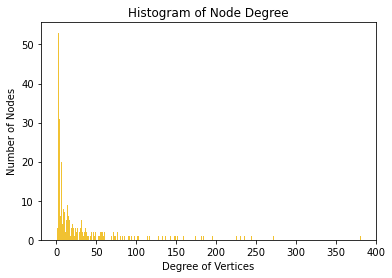

In [10]:
# Ploting a histogram of node degree
plt.hist(list(net.degree()), bins=range(max(net.degree()) + 2), color='#f1c232')
plt.xlabel('Degree of Vertices')
plt.ylabel('Number of Nodes')
plt.title('Histogram of Node Degree')
plt.show()

### Identifying the node with the highest degree

In [11]:
# Create a data frame with node names and degrees
node_degrees = pd.DataFrame({'Airport': net.vs['name'], 'Degree': net.vs['degree']})

# Sort the data frame by degree in descending order
node_degrees = node_degrees.sort_values('Degree', ascending=False)

# Print the top 10 nodes with the highest degree
print(node_degrees.head(10))

   Airport  Degree
1      ATL     380
10     ORD     296
13     DFW     286
6      CVG     272
31     MSP     261
14     IAH     244
7      DTW     235
19     DEN     230
41     SLC     225
24     LAS     195


The node with the highest degree by some margin was Hartsfield-Jackson Atlanta International Airport (ATL). In the context of an airport network, the node with the highest degree can be perceived as a major hub and gateway for air travel due to it's accessibility, connectivity and importance. This is consistent with the fact that ATL has held the top spot as the world's busiest airport each year since 1988, except for 2020, due to the effects of the COVID-19 pandemic, which could have significantly contributed to the ATL node having the highest degree in the network. 

As an airport that handles a significant amount of passenger traffic, ATL is likely to have a high number of direct connections (flights) with a large number of airports around the world, increasing connections and higher connectivity, factors which could have also contributed to the high degree of the ATL node. 

Therefore, it would be appropriate to analyze the flight journeys of flights arriving and departing from ATL to detect whether delays in the airport would cause cascading failures in other airports, given that it would potentially have a greater impact for cascading failures or delays in other airports.

### Calculating the node betweenness centrality scores

#### Why?
An airport with a high betweenness centrality score may not have the highest degree, but it may serve as a critical hub connecting many airports with high degrees, which could indicate its importance in the network.

In [12]:
# Add the arrival delay as a new edge attribute
arr_delay = q5_ontime["ArrDelay"]
net.es["arr_delay"] = arr_delay

# Remove edges with negative or zero weights for both arrival and departure delays
net.delete_edges(net.es[arr_delay <= 0])

In [13]:
# Calculate node betweenness centrality with normalized and positive weights for both arrival and departure delays
bc = net.betweenness(weights=net.es["arr_delay"], directed=True)

# Add betweenness centrality as a new vertex attribute
net.vs["betweenness"] = bc

# Create a data frame with node names and betweenness centrality
node_bc = pd.DataFrame({'Airport': net.vs['name'], 'Betweenness Centrality Score': net.vs['betweenness']})

# Sort the data frame by betweenness centrality in descending order
node_bc = node_bc.sort_values('Betweenness Centrality Score', ascending=False)

# Print the top 10 nodes with the highest betweenness centrality scores
print(node_bc.head(10))

   Airport  Betweenness Centrality Score
1      ATL                  28302.319600
41     SLC                  18331.655073
13     DFW                  16095.283222
6      CVG                  14662.382787
14     IAH                  14347.080481
44     TPA                  11871.209424
31     MSP                  10758.907143
19     DEN                   9336.745069
25     LAX                   9269.951082
5      CLT                   8964.923593


Once again the ATL node ranked the highest in terms of betweenness centrality scores, meaning that ATL has the most connections to other airports, as well as the highest potential to influence the flow of passengers in the flight network (USA) as it also had the highest node degree.

This certifies that ATL is the major hub for air travel in the network, and thus, further supports the decision to analyze flights arriving and departing from ATL to detect whether delays in the airport would cause cascading failures in other airports.

### Calculating the edge betweenness centrality score

#### Why?
To understand which flight routes serve as important connections between different airports.

In [14]:
# Calculate node betweenness centrality with normalized and positive weights for both arrival and departure delays
ebc = net.edge_betweenness(weights=net.es["arr_delay"], directed=True)

### Identifying critical edges

In [15]:
# Identify the critical edges (top 1% of betweenness centrality scores)
n_edges = len(net.es)
critical_edges = sorted(range(n_edges), key=lambda i: ebc[i], reverse=True)[:int(n_edges*0.01)]

In [16]:
# Create a list of critical edges with their betweenness centrality score
edges = net.es
vertices = net.vs
critical_edges_list = []
for edge_idx in critical_edges:
    edge = edges[edge_idx]
    source_name = vertices[edge.source]["label"]
    target_name = vertices[edge.target]["label"]
    bc_score = ebc[edge_idx]
    critical_edges_list.append({'From': source_name, 'To': target_name, 'Betweenness Centrality Score': bc_score})

# Create a data frame with critical edges and their betweenness centrality score
critical_edges_df = pd.DataFrame(critical_edges_list)

# Print the critical edges and their betweenness centrality score
display(critical_edges_df.head(10))

,From,To,Betweenness Centrality Score
0,MDW,ATL,6055.638925
1,TPA,SLC,5903.322294
2,CVG,DFW,5190.037118
3,CLT,TPA,5103.759343
4,SLC,ANC,3765.456421
5,IAH,DTW,3516.145127
6,ANC,SFO,3458.645743
7,DTW,PHX,3450.360662
8,TPA,IAH,3422.936963
9,SLC,ATL,3406.928571


MDW-ATL tops the list of critical edges based on their betweenness centrality score, this is significant as since ATL is highly connected to other aiports in the USA and serves as a crucial hub.

### Average arrival delay of the MDW-ATL flight route

In [17]:
MDW_ATL_AvgArrDelay = pd.read_sql_query("""
                                        SELECT Route, AVG(ArrDelay) AS AvgArrDelay
                                        FROM ontime JOIN airports ON ontime.Origin = airports.iata
                                        WHERE Route = 'MDW-ATL' AND ArrDelay IS NOT NULL
                                        ORDER BY AVG(ArrDelay) DESC
                                        """, conn)

In [18]:
display(MDW_ATL_AvgArrDelay)

,Route,AvgArrDelay
0,MDW-ATL,14.696341


### Part 1: Analyzing MDW-ATL flights with arrival delays close to the average arrival delay (Low degree of delay)

In [19]:
# Identifying flights with the MDW_ATL route
MDW_ATL_flights_p1 = pd.read_sql_query("""
                                       SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                                        DepDelay, Origin, Dest, airports1.airport AS 'Departure Airport', airports2.airport AS 'Arrival Airport'
                                       FROM ontime 
                                       JOIN airports AS airports1 ON ontime.Origin = airports1.iata
                                       JOIN airports AS airports2 ON ontime.Dest = airports2.iata
                                       WHERE Route = 'MDW-ATL' AND ArrDelay IS NOT NULL AND ArrDelay = 15 AND Cancelled = 0 AND Diverted = 0
                                       """, conn)

In [20]:
# Print the output
display(MDW_ATL_flights_p1.head())

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,Departure Airport,Arrival Airport
0,2005,1,20,1547.0,1512,1825.0,1810,N3752,15.0,35.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
1,2005,1,22,947.0,920,1228.0,1213,N3736C,15.0,27.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
2,2005,2,9,939.0,925,1229.0,1214,N948AT,15.0,14.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
3,2005,2,14,1935.0,1920,2225.0,2210,N982AT,15.0,15.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
4,2005,3,16,1517.0,1505,1815.0,1800,N935AT,15.0,12.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl


#### Investigating flight N3736C specifically

In [21]:
N3736C = pd.read_sql_query("""
                           SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, DepDelay,
                            ArrDelay, Origin, Dest, airports1.airport AS 'Departure Airport', airports2.airport AS 'Arrival Airport'
                           FROM ontime 
                           JOIN airports AS airports1 ON ontime.Origin = airports1.iata
                           JOIN airports AS airports2 ON ontime.Dest = airports2.iata
                           WHERE Year = 2005 AND Month = 1 AND DayofMonth = 22 AND TailNum = 'N3736C' AND Cancelled = 0 AND Diverted = 0
                           ORDER BY CRSDepTime
                           """, conn)

In [22]:
display(N3736C.head())

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,DepDelay,ArrDelay,Origin,Dest,Departure Airport,Arrival Airport
0,2005,1,22,947.0,920,1228.0,1213,N3736C,27.0,15.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
1,2005,1,22,1314.0,1303,1513.0,1417,N3736C,11.0,56.0,ATL,MCI,William B Hartsfield-Atlanta Intl,Kansas City International
2,2005,1,22,1551.0,1440,1839.0,1734,N3736C,71.0,65.0,MCI,ATL,Kansas City International,William B Hartsfield-Atlanta Intl
3,2005,1,22,2216.0,2219,2354.0,2343,N3736C,-3.0,11.0,ATL,SRQ,William B Hartsfield-Atlanta Intl,Sarasota Bradenton International


In [23]:
# Extract three rows from the data and store them in a new DataFrame
q5_N3736C = N3736C.iloc[0:3, :]
q5_N3736C

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,DepDelay,ArrDelay,Origin,Dest,Departure Airport,Arrival Airport
0,2005,1,22,947.0,920,1228.0,1213,N3736C,27.0,15.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
1,2005,1,22,1314.0,1303,1513.0,1417,N3736C,11.0,56.0,ATL,MCI,William B Hartsfield-Atlanta Intl,Kansas City International
2,2005,1,22,1551.0,1440,1839.0,1734,N3736C,71.0,65.0,MCI,ATL,Kansas City International,William B Hartsfield-Atlanta Intl


### Part 2: Analyzing MDW-ATL flights with arrival delays of an hour (Medium degree of delay)

In [24]:
# Identifying flights with the MDW-ATL route
MDW_ATL_flights_p2 = pd.read_sql_query("""
                                    SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                                        DepDelay, Origin, Dest, airports1.airport AS 'Departure Airport', airports2.airport AS 'Arrival Airport'
                                    FROM ontime 
                                    JOIN airports AS airports1 ON ontime.Origin = airports1.iata
                                    JOIN airports AS airports2 ON ontime.Dest = airports2.iata
                                    WHERE Route = 'MDW-ATL' AND ArrDelay IS NOT NULL AND ArrDelay = 60 AND Cancelled = 0 AND Diverted = 0
                                    """, conn)

In [25]:
display(MDW_ATL_flights_p2.head())

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,Departure Airport,Arrival Airport
0,2005,1,22,1632.0,1520,1915.0,1815,N948AT,60.0,72.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
1,2005,2,28,1946.0,1900,2259.0,2159,N3730B,60.0,46.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
2,2005,3,10,1716.0,1615,2011.0,1911,N312DL,60.0,61.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
3,2005,4,1,1602.0,1505,1900.0,1800,N989AT,60.0,57.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
4,2005,4,1,1328.0,1253,1643.0,1543,N604AT,60.0,35.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl


In [26]:
# Tracking flight number N948AT
N948AT = pd.read_sql_query("""
                           SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                            DepDelay, Origin, Dest, airports1.airport AS 'Departure Airport', airports2.airport AS 'Arrival Airport'
                           FROM ontime 
                           JOIN airports AS airports1 ON ontime.Origin = airports1.iata
                           JOIN airports AS airports2 ON ontime.Dest = airports2.iata
                           WHERE Year = 2005 AND Month = 1 AND DayofMonth = 22 AND TailNum = 'N948AT' AND Cancelled = 0 AND Diverted = 0
                           ORDER BY CRSDepTime
                           """, conn)

In [27]:
display(N948AT.head())

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,Departure Airport,Arrival Airport
0,2005,1,22,700.0,700,933.0,933,N948AT,0.0,0.0,PHL,MCO,Philadelphia Intl,Orlando International
1,2005,1,22,1258.0,1300,1505.0,1445,N948AT,20.0,-2.0,MCO,MDW,Orlando International,Chicago Midway
2,2005,1,22,1632.0,1520,1915.0,1815,N948AT,60.0,72.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
3,2005,1,22,1940.0,1905,2005.0,1926,N948AT,39.0,35.0,ATL,MEM,William B Hartsfield-Atlanta Intl,Memphis International
4,2005,1,22,2022.0,1958,2230.0,2214,N948AT,16.0,24.0,MEM,ATL,Memphis International,William B Hartsfield-Atlanta Intl


In [28]:
N948AT = pd.read_sql_query("""
                           SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, DepDelay, 
                            ArrDelay, Origin, Dest, airports1.airport AS 'Departure Airport', airports2.airport AS 'Arrival Airport'
                           FROM ontime 
                           JOIN airports AS airports1 ON ontime.Origin = airports1.iata
                           JOIN airports AS airports2 ON ontime.Dest = airports2.iata
                           WHERE Year = 2005 AND Month = 1 AND DayofMonth = 22 AND TailNum = 'N948AT' AND Cancelled = 0 AND Diverted = 0
                           ORDER BY CRSDepTime
                           """, conn)

In [29]:
# Extract three rows from the data and store them in a new DataFrame
q5_N948AT = N948AT.iloc[2:5, :]
q5_N948AT

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,DepDelay,ArrDelay,Origin,Dest,Departure Airport,Arrival Airport
2,2005,1,22,1632.0,1520,1915.0,1815,N948AT,72.0,60.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
3,2005,1,22,1940.0,1905,2005.0,1926,N948AT,35.0,39.0,ATL,MEM,William B Hartsfield-Atlanta Intl,Memphis International
4,2005,1,22,2022.0,1958,2230.0,2214,N948AT,24.0,16.0,MEM,ATL,Memphis International,William B Hartsfield-Atlanta Intl


### Part 3: Analyzing MDW-ATL flights with arrival delays of two hours (High degree of delay)

In [30]:
# Identifying flights with the MDW-ATL route
MDW_ATL_flights_p3 = pd.read_sql_query("""
                                    SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, ArrDelay,
                                        DepDelay, Origin, Dest, airports.airport AS 'Departing Airport'
                                    FROM ontime JOIN airports ON ontime.Origin = airports.iata
                                    WHERE Route = 'MDW-ATL' AND ArrDelay IS NOT NULL AND ArrDelay = 120 AND Cancelled = 0 AND Diverted = 0
                                    """, conn)

In [31]:
MDW_ATL_flights_p3

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,ArrDelay,DepDelay,Origin,Dest,Departing Airport
0,2005,1,5,1545.0,1400,1850.0,1650,N990AT,120.0,105.0,MDW,ATL,Chicago Midway
1,2005,8,10,1927.0,1723,2225.0,2025,N988AT,120.0,124.0,MDW,ATL,Chicago Midway
2,2006,1,22,1832.0,1637,2133.0,1933,N166AT,120.0,115.0,MDW,ATL,Chicago Midway
3,2006,5,25,1225.0,1016,1508.0,1308,N917EV,120.0,129.0,MDW,ATL,Chicago Midway
4,2006,6,28,1749.0,1546,2037.0,1837,N281AT,120.0,123.0,MDW,ATL,Chicago Midway
5,2006,10,21,1225.0,1020,1511.0,1311,N878AS,120.0,125.0,MDW,ATL,Chicago Midway
6,2006,10,2,1944.0,1804,2252.0,2052,N961AT,120.0,100.0,MDW,ATL,Chicago Midway
7,2007,9,13,1931.0,1751,2238.0,2038,N279AT,120.0,100.0,MDW,ATL,Chicago Midway


#### Investigating flight N878AS specifically

In [32]:
# Tracking flight number N878AS
N878AS = pd.read_sql_query("""
                           SELECT Year, Month, DayofMonth, DepTime, CRSDepTime, ArrTime, CRSArrTime, TailNum, DepDelay,
                            ArrDelay, Origin, Dest, airports1.airport AS 'Departure Airport', airports2.airport AS 'Arrival Airport'
                           FROM ontime 
                           JOIN airports AS airports1 ON ontime.Origin = airports1.iata
                           JOIN airports AS airports2 ON ontime.Dest = airports2.iata
                           WHERE Year = 2006 AND Month = 10 AND DayofMonth = 21 AND TailNum = 'N878AS' AND Cancelled = 0 AND Diverted = 0
                           ORDER BY CRSDepTime
                           """, conn)

In [33]:
# Print the output
N878AS

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,DepDelay,ArrDelay,Origin,Dest,Departure Airport,Arrival Airport
0,2006,10,21,745.0,630,949.0,835,N878AS,75.0,74.0,TUP,ATL,Tupelo Municipal,William B Hartsfield-Atlanta Intl
1,2006,10,21,1102.0,900,1156.0,954,N878AS,122.0,122.0,ATL,MDW,William B Hartsfield-Atlanta Intl,Chicago Midway
2,2006,10,21,1225.0,1020,1511.0,1311,N878AS,125.0,120.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
3,2006,10,21,1547.0,1455,1700.0,1613,N878AS,52.0,47.0,ATL,RDU,William B Hartsfield-Atlanta Intl,Raleigh-Durham International
4,2006,10,21,1725.0,1645,1850.0,1810,N878AS,40.0,40.0,RDU,ATL,Raleigh-Durham International,William B Hartsfield-Atlanta Intl
5,2006,10,21,2037.0,2037,2029.0,2044,N878AS,0.0,-15.0,ATL,GTR,William B Hartsfield-Atlanta Intl,Golden Triangle Regional


In [34]:
# Extract the first three rows of the data and store them in a new DataFrame
q5_N878AS = N878AS.iloc[2:5, :]
q5_N878AS

,Year,Month,DayofMonth,DepTime,CRSDepTime,ArrTime,CRSArrTime,TailNum,DepDelay,ArrDelay,Origin,Dest,Departure Airport,Arrival Airport
2,2006,10,21,1225.0,1020,1511.0,1311,N878AS,125.0,120.0,MDW,ATL,Chicago Midway,William B Hartsfield-Atlanta Intl
3,2006,10,21,1547.0,1455,1700.0,1613,N878AS,52.0,47.0,ATL,RDU,William B Hartsfield-Atlanta Intl,Raleigh-Durham International
4,2006,10,21,1725.0,1645,1850.0,1810,N878AS,40.0,40.0,RDU,ATL,Raleigh-Durham International,William B Hartsfield-Atlanta Intl


## Close the database connection

In [35]:
conn.close()